# Regularized methods for regression


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [8]:
def reg_plot(ax, X, y, y_pred, title, color="steelblue"):
    ax.scatter(X, y, c=color, edgecolor="white", s=70)
    ax.plot(X, y_pred, color="black", lw=2)
    ax.set_title(title)
    return


def res_plot(ax, y_pred, y, title, color="steelblue"):
    ax.scatter(y_pred, y_pred - y, c=color, marker="o", edgecolor="white", s=70)
    ax.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
    ax.axes.set_aspect("equal")
    ax.set_title(title)


def store_results(df, model_name, model, y_train, y_test, y_train_pred, y_test_pred):

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    data = {
        "Model": model_name,
        "Coef": model.coef_[0],  # Need to extract the model out from the wrapper.
        "Intercept": model.intercept_,
        "MSE Train": [MSE_train],
        "MSE Test": [MSE_test],
        "R2 Train": [R2_train],
        "R2 Test": [R2_test],
    }
    dft = pd.DataFrame(data=data)
    return df.append(dft, ignore_index=True)


In [9]:
def run_model(model, model_name, X_train, y_train, X_test, y_test, df):

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    fig, ax = plt.subplots(
        1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True
    )
    reg_plot(ax=ax[0], X=X_train, y=y_train, y_pred=y_train_pred, title="Train")
    reg_plot(
        ax=ax[1],
        X=X_test,
        y=y_test,
        y_pred=y_test_pred,
        title="test",
        color="limegreen",
    )
    fig.supxlabel("Lower status of the population [LSTAT]")
    fig.supylabel("Median value of homes in $1000s [MEDV]")

    df = store_results(
        df=df,
        model=model,
        model_name=model_name,
        y_train=y_train,
        y_train_pred=y_train_pred,
        y_test=y_test,
        y_test_pred=y_test_pred,
    )

    return df


In [10]:
# Load data
df = pd.read_excel("housing_data.xlsx",)
df.head()

# Extract data
X = df[["LSTAT"]].values
y = df["MEDV"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



## Ridge regression


,Model,Coef,Intercept,MSE Train,MSE Test,R2 Train,R2 Test
0,Ridge-1,-0.968086,34.789100,37.933978,39.816816,0.552478,0.521809
1,Ridge-100,-0.962698,34.722067,37.935458,39.785415,0.552461,0.522186
2,Ridge-10000,-0.618468,30.439624,44.043058,44.183271,0.480407,0.469369
3,Ridge-1000000,-0.016826,22.954806,83.150862,82.151166,0.019037,0.013383


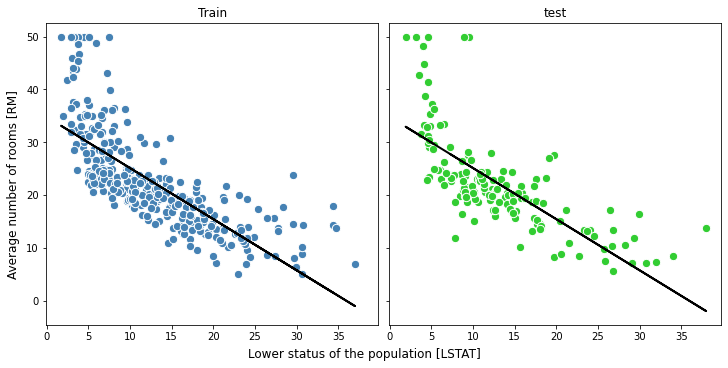

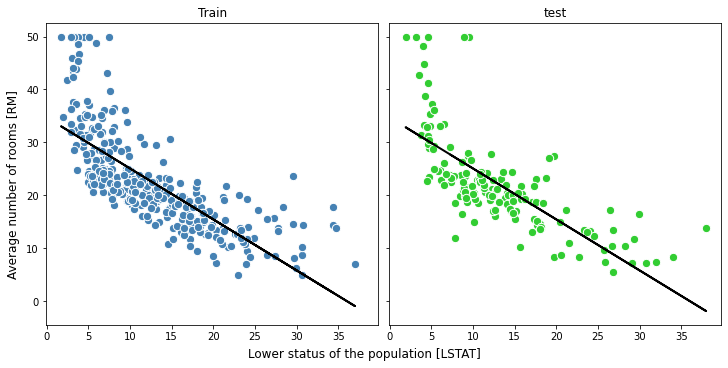

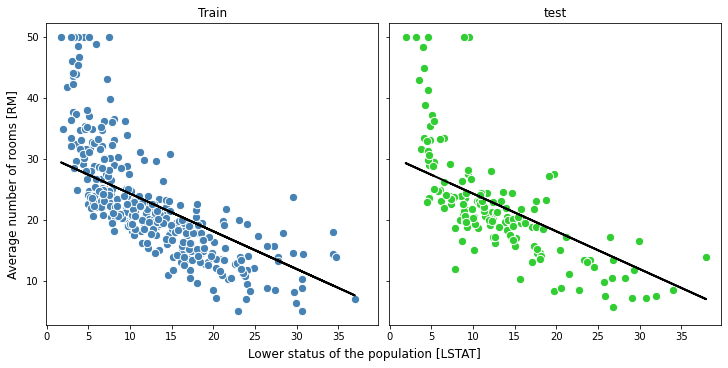

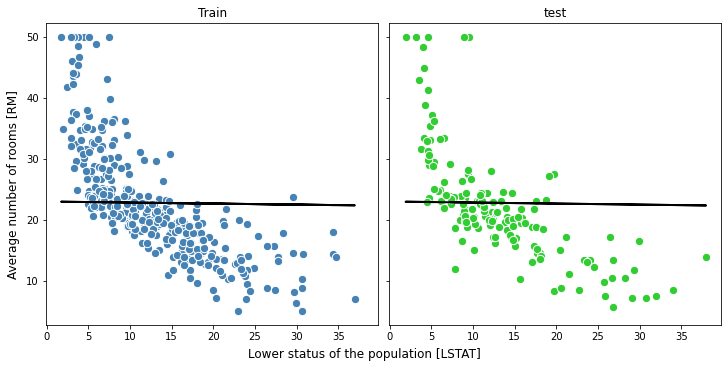

In [11]:
from sklearn.linear_model import Ridge

alphas = [1, 100, 10 ** 4, 10 ** 6]

dfAll = pd.DataFrame()
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    dfAll = run_model(
        model=ridge,
        model_name=f"Ridge-{alpha}",
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        df=dfAll,
    )

display(dfAll)


## LASSO

(Least Absoluate Shrinkage and Selection Operator)


,Model,Coef,Intercept,MSE Train,MSE Test,R2 Train,R2 Test
0,Ridge-1,-0.968086,34.789100,37.933978,39.816816,0.552478,0.521809
1,Ridge-100,-0.962698,34.722067,37.935458,39.785415,0.552461,0.522186
2,Ridge-10000,-0.618468,30.439624,44.043058,44.183271,0.480407,0.469369
3,Ridge-1000000,-0.016826,22.954806,83.150862,82.151166,0.019037,0.013383
4,Lasso-1,-0.948126,34.540785,37.953993,39.715971,0.552242,0.523020
5,Lasso-10,-0.767994,32.299829,39.935443,40.723773,0.528866,0.510917
6,Lasso-30,-0.367701,27.319925,55.947159,55.326469,0.339970,0.335542


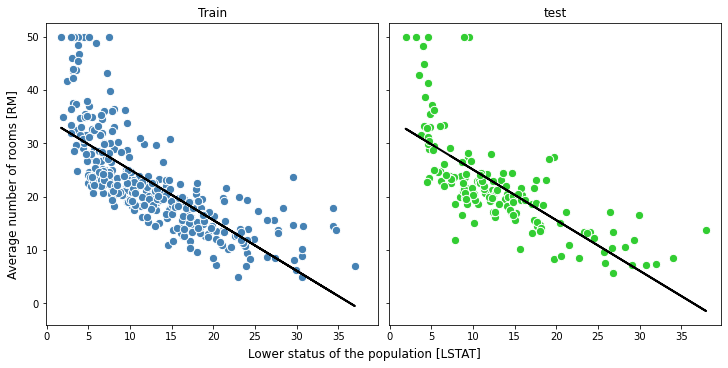

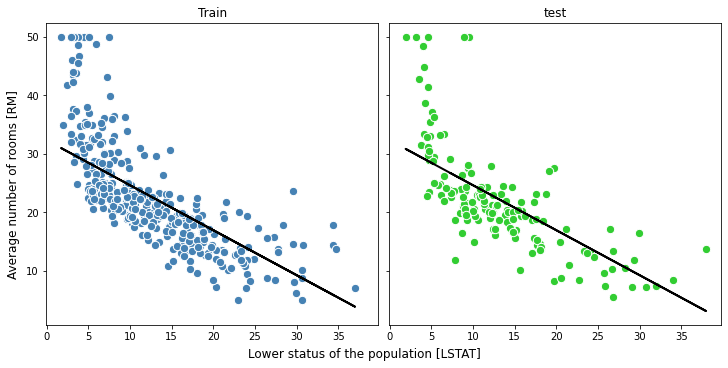

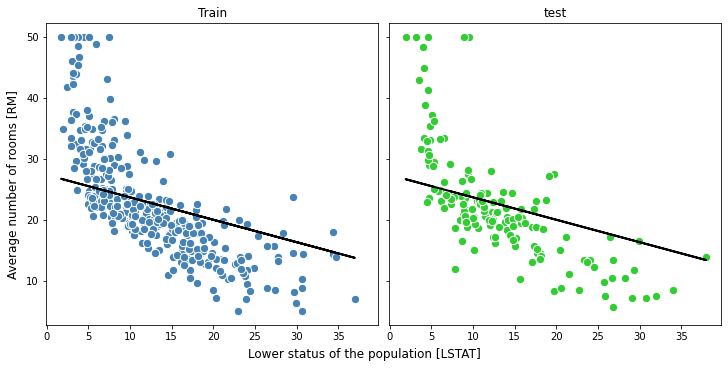

In [12]:
from sklearn.linear_model import Lasso

alphas = [1, 10, 30]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    dfAll = run_model(
        model=lasso,
        model_name=f"Lasso-{alpha}",
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        df=dfAll,
    )

display(dfAll)


## Elastic Net


,Model,Coef,Intercept,MSE Train,MSE Test,R2 Train,R2 Test
0,Ridge-1,-0.968086,34.789100,37.933978,39.816816,0.552478,0.521809
1,Ridge-100,-0.962698,34.722067,37.935458,39.785415,0.552461,0.522186
2,Ridge-10000,-0.618468,30.439624,44.043058,44.183271,0.480407,0.469369
3,Ridge-1000000,-0.016826,22.954806,83.150862,82.151166,0.019037,0.013383
4,Lasso-1,-0.948126,34.540785,37.953993,39.715971,0.552242,0.523020
5,Lasso-10,-0.767994,32.299829,39.935443,40.723773,0.528866,0.510917
6,Lasso-30,-0.367701,27.319925,55.947159,55.326469,0.339970,0.335542
7,Elas-1-0.5,-0.948640,34.547180,37.952978,39.718036,0.552254,0.522995
8,Elas-10-0.5,-0.789100,32.562394,39.535589,40.427097,0.533583,0.514480
9,Elas-30-0.5,-0.513699,29.136225,48.252305,48.024934,0.430749,0.423231


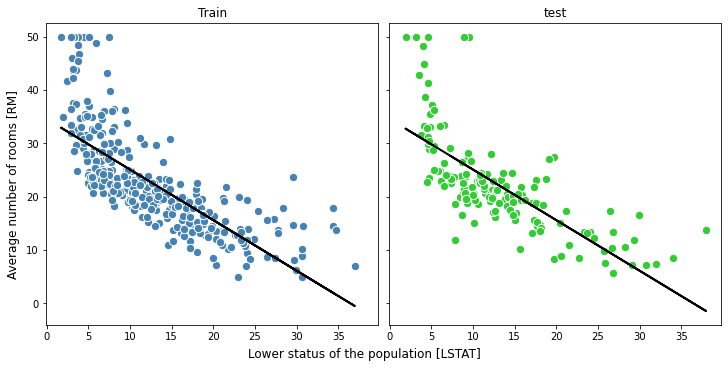

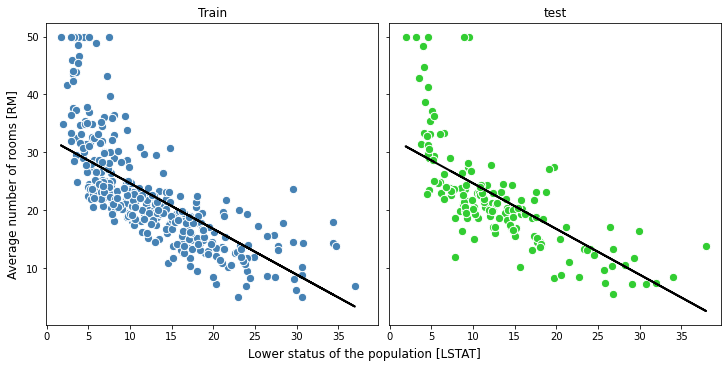

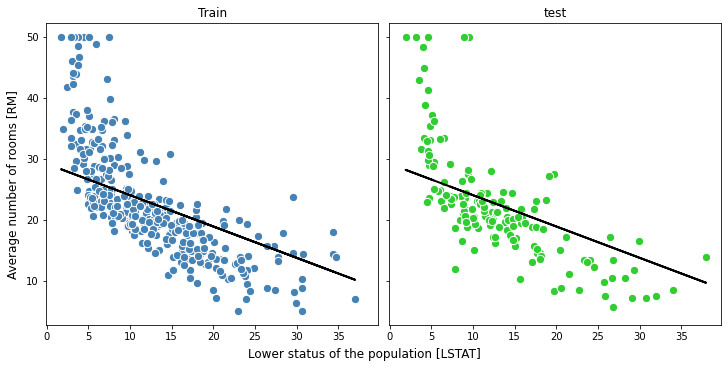

In [13]:
from sklearn.linear_model import ElasticNet

alphas = [1, 10, 30]
ratios = [0.5, 0.5, 0.5] #if ratio = 1, we have LASSO.

for alpha, ratio in zip(alphas, ratios):
    elas = ElasticNet(alpha=alpha, l1_ratio=ratio)
    dfAll = run_model(
        model=elas,
        model_name=f"Elas-{alpha}-{ratio}",
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        df=dfAll,
    )

display(dfAll)
